In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Images-20240703.zip

unzip:  cannot find or open /content/drive/MyDrive/Images-20240703.zip, /content/drive/MyDrive/Images-20240703.zip.zip or /content/drive/MyDrive/Images-20240703.zip.ZIP.


A Grayscale Image

Increasing Brightness

Data type of original image: uint8
Data type of brightened image: uint8


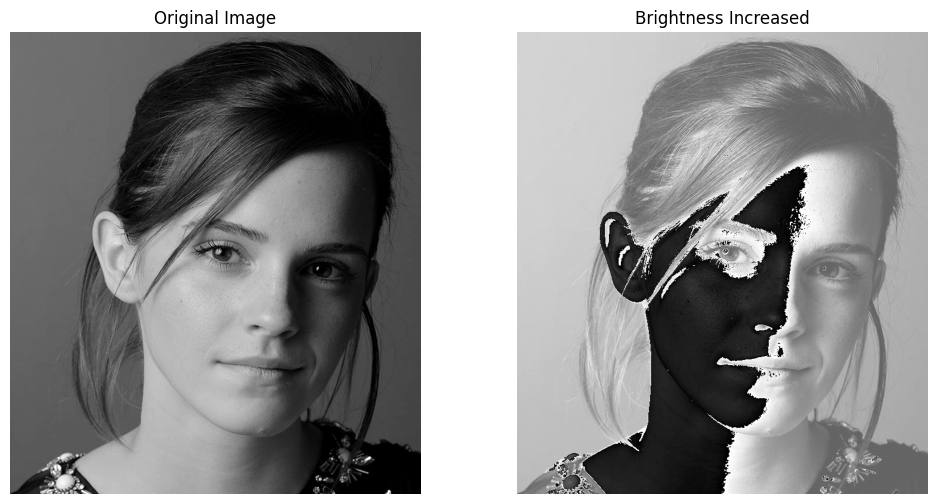

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Read the image in grayscale
im1 = cv.imread(r'/content/drive/MyDrive/Images-20240703 (1)/emma.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if im1 is None:
    raise FileNotFoundError("The image file was not found. Check the path and filename.")

# Increase the brightness
im2 = im1+100


# Check the data type of the image
print(f"Data type of original image: {im1.dtype}")
print(f"Data type of brightened image: {im2.dtype}")

# Display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(im2, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Brightness Increased')
for a in ax:
    a.axis('off')
plt.show()



The issue arises because adding 100 to the pixel values of an 8-bit image (uint8) can cause overflow, resulting in values wrapping around from 0, leading to unexpected dark areas. To fix this, use cv2.add, which handles overflow by clipping values to the valid range of 0 to 255:

Increasing Brightness using cv

Data type of original image: uint8
Data type of brightened image: uint8


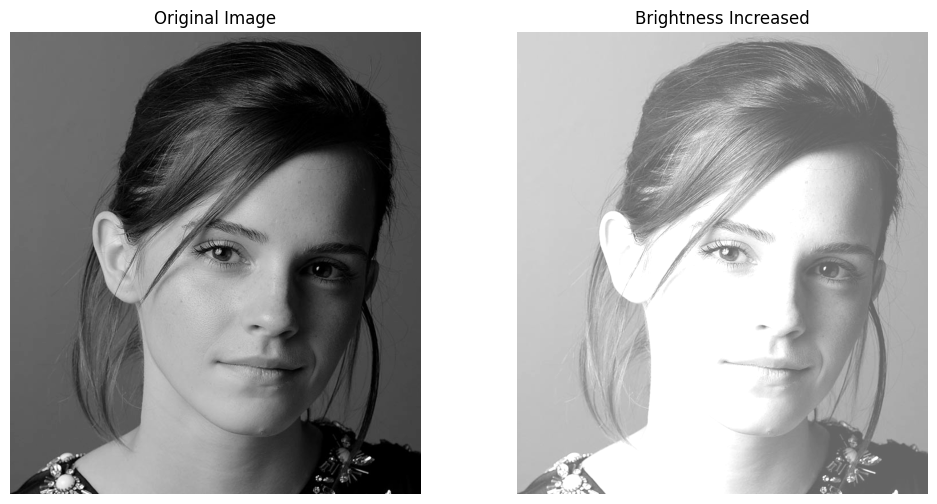

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Read the image in grayscale
im1 = cv.imread(r'/content/drive/MyDrive/Images-20240703 (1)/emma.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if im1 is None:
    raise FileNotFoundError("The image file was not found. Check the path and filename.")

# Increase the brightness
im2 = cv.add(im1, 100)

# Check the data type of the image
print(f"Data type of original image: {im1.dtype}")
print(f"Data type of brightened image: {im2.dtype}")

# Display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(im2, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Brightness Increased')
for a in ax:
    a.axis('off')
plt.show()



Obtaining One Color Plane

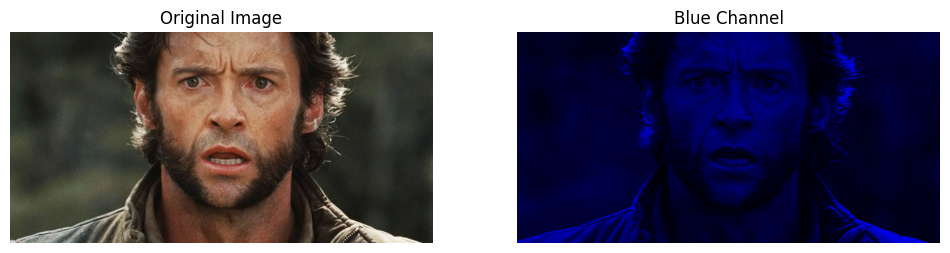

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('/content/drive/MyDrive/Images-20240703 (1)/hugh.jpg')
im_blue = im.copy()
im_blue[:,:,1] = 0
im_blue[:,:,2] = 0
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_blue, cv.COLOR_BGR2RGB))
ax[1].set_title('Blue Channel')
for a in ax:
  a.axis('off')
plt.show()





Intensity Windowing

256


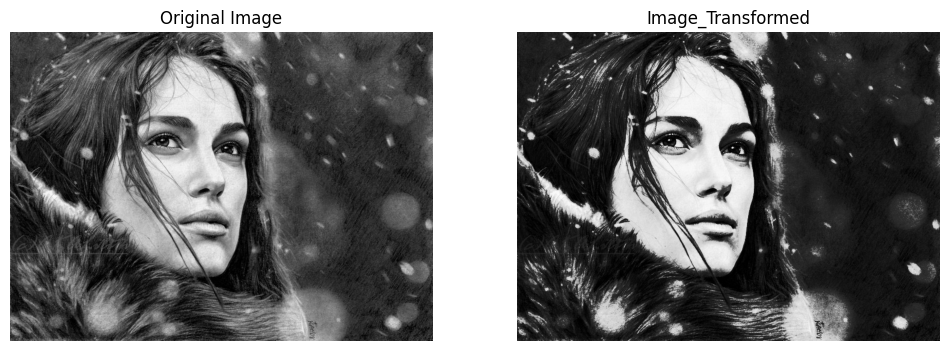

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = np.array([(100, 50), (150, 200)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
img_orig = cv.imread('/content/drive/MyDrive/Images-20240703 (1)/keira_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('Image_Transformed')
for a in ax:
  a.axis('off')
plt.show()


The transformed image displays modified brightness and contrast based on the defined piecewise linear mapping

Gamma Correction

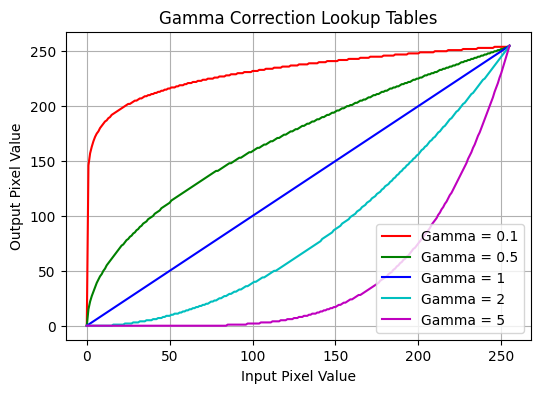

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define gamma values
gamma_values = [0.1, 0.5, 1, 2, 5]

# Create lookup tables for different gamma correction values
lookup_tables = [
    np.array([(i / 255.0) ** gamma * 255 for i in np.arange(0, 256)]).astype(np.uint8)
    for gamma in gamma_values
]

# Plot all lookup tables on the same graph
plt.figure(figsize=(6, 4))

colors = ['r', 'g', 'b', 'c', 'm', ]  # Different colors for each plot

for i, gamma in enumerate(gamma_values):
    plt.plot(lookup_tables[i], label=f'Gamma = {gamma}', color=colors[i])

plt.title('Gamma Correction Lookup Tables')
plt.xlabel('Input Pixel Value')
plt.ylabel('Output Pixel Value')
plt.legend()
plt.grid(True)

plt.show()


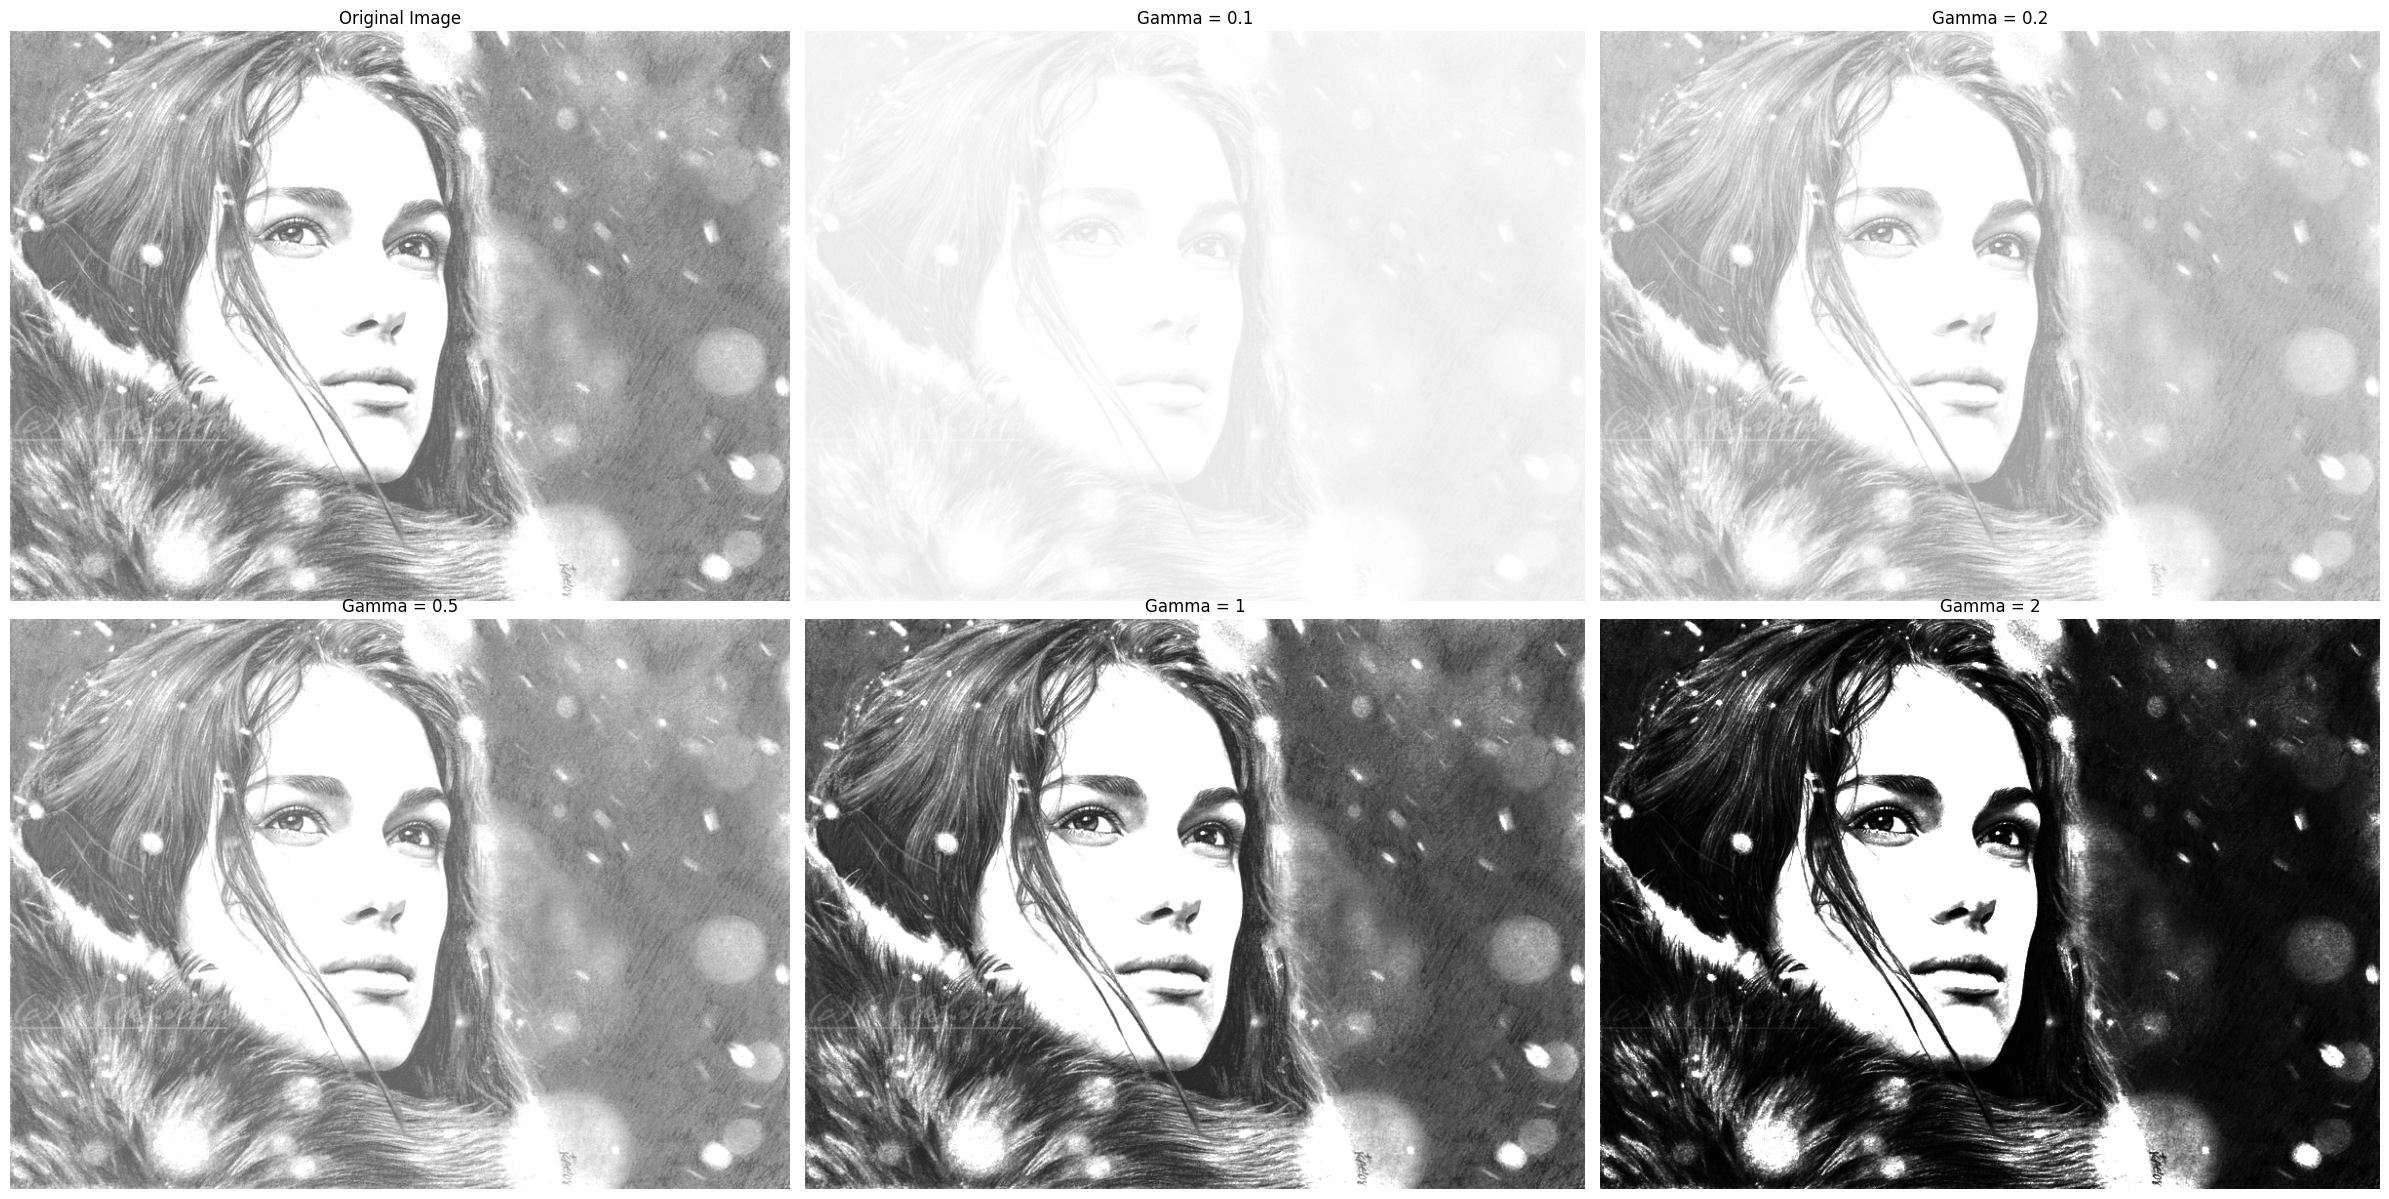

In [28]:
14
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
f = cv.imread('/content/drive/MyDrive/Images-20240703 (1)/keira_gray.jpg', cv.IMREAD_GRAYSCALE)
f=cv.add(f, 100)

# Gamma correction value
gamma = 1.5

# Create a lookup table for gamma correction
t1 = np.array([(i / 255.0) ** 0.1 * 255 for i in np.arange(0, 256)]).astype(np.uint8)
t2 = np.array([(i / 255.0) ** 0.5 * 255 for i in np.arange(0, 256)]).astype(np.uint8)
t3 = np.array([(i / 255.0) ** 1 * 255 for i in np.arange(0, 256)]).astype(np.uint8)
t4 = np.array([(i / 255.0) ** 2 * 255 for i in np.arange(0, 256)]).astype(np.uint8)
t5 = np.array([(i / 255.0) ** 5 * 255 for i in np.arange(0, 256)]).astype(np.uint8)
# Apply the gamma correction using the lookup table
g1 = cv.LUT(f, t1)
g2 = cv.LUT(f, t2)
g3 = cv.LUT(f, t3)
g4 = cv.LUT(f, t4)
g5 = cv.LUT(f, t5)


# Display images using matplotlib
fig, ax = plt.subplots(2, 3, figsize=(24, 12))

ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')

ax[0, 1].imshow(g1, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Gamma = 0.1')

ax[0, 2].imshow(g2, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title('Gamma = 0.2')

ax[1, 0].imshow(g3, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title('Gamma = 0.5')

ax[1, 1].imshow(g4, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title('Gamma = 1')

ax[1, 2].imshow(g5, cmap='gray', vmin=0, vmax=255)
ax[1, 2].set_title('Gamma = 2')

for row in ax:
    for a in row:
        a.axis('off')

plt.tight_layout()
plt.show()



Gamma correction is a nonlinear operation used to adjust the brightness of an image. It involves applying a power-law transformation to the pixel values

Gamma < 1: Brightens the image by enhancing darker pixels.

Gamma = 1: Leaves the image unchanged.

Gamma > 1: Darkens the image by reducing the intensity of lighter pixels.

This adjustment is essential for displaying images correctly on different devices, as it compensates for the nonlinear response of display systems.

enhancing the saturation using the HSV color space

Text(0.5, 1.0, 'With transformation')

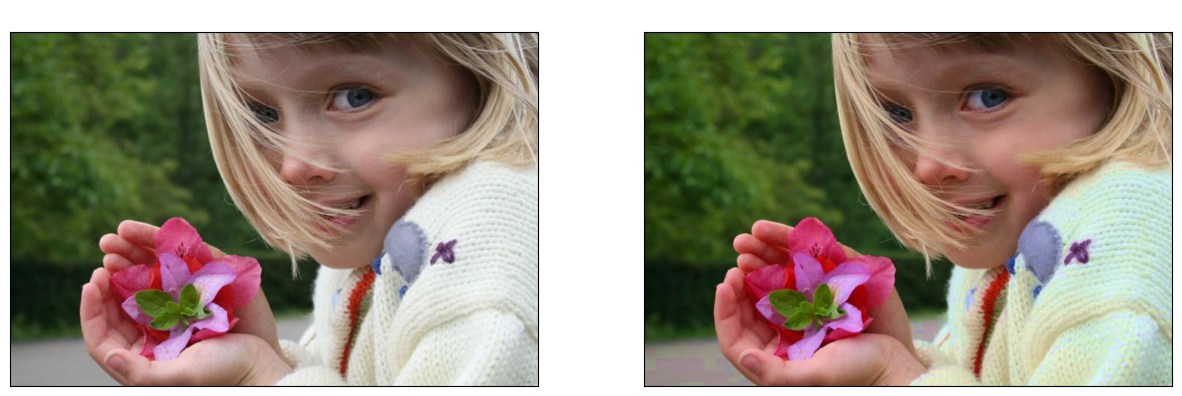

In [53]:
spider_img=cv.imread("/content/drive/MyDrive/Images-20240703 (1)/girl.jpg",1)
image=cv.cvtColor(spider_img,cv.COLOR_BGR2RGB)
fig,ax=plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(image)
img=cv.cvtColor(spider_img,cv.COLOR_BGR2HSV)
hue,saturation,value=cv.split(img)
a=0.2
stan=70
saturation=(np.minimum(saturation+(a)*128*np.exp((-(saturation-128)**2)/(2*stan**2)),255)).astype(np.uint8)
spider_img=cv.merge([hue,saturation,value])
spider_img=cv.cvtColor(spider_img,cv.COLOR_HSV2RGB)
ax[1].imshow(spider_img)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[0].set_title("Original image",c="w")
ax[1].set_title("With transformation",c="w")

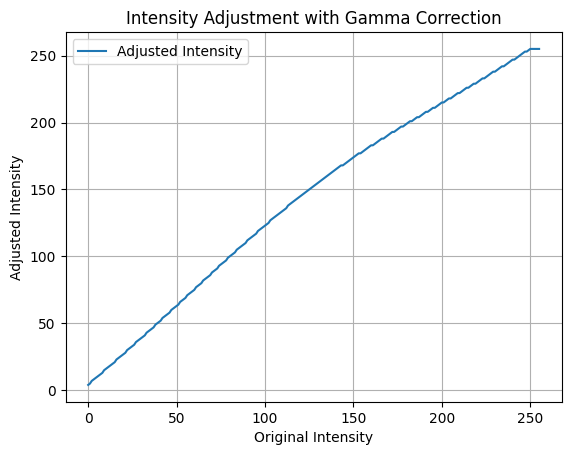

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0.2
stan = 70

# Create an array of intensity values
x = np.arange(0, 256)  # Intensity values from 0 to 255

# Compute the adjusted intensity
Inten = np.minimum(x + (a) * 128 * np.exp(-(x - 128) ** 2 / (2 * stan ** 2)), 255).astype(np.uint8)

# Plot the adjusted intensity
plt.plot(x, Inten, label='Adjusted Intensity')
plt.xlabel('Original Intensity')
plt.ylabel('Adjusted Intensity')
plt.title('Intensity Adjustment with Gamma Correction')
plt.legend()
plt.grid(True)
plt.show()


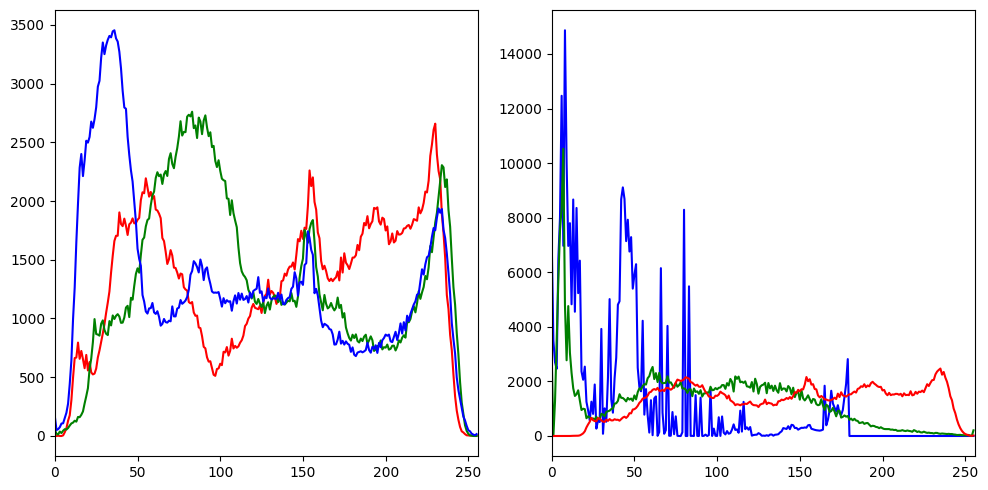

In [55]:
color=['r','g','b']
fig,ax=plt.subplots(1,2,figsize=(10,5))

for i,c in enumerate(color):
    hist=cv.calcHist([image],[i],None,[256],[0,256])
    ax[0].plot(hist,color=c)
    ax[0].set_xlim([0,256])

color=['b','g','r']
for i,c in enumerate(color):
    hist=cv.calcHist([img],[i],None,[256],[0,256])
    ax[1].plot(hist,color=c)
    ax[1].set_xlim([0,256])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'V plane')

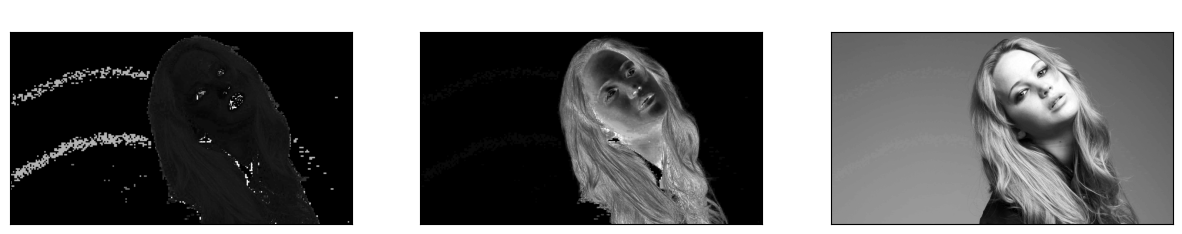

In [56]:
jen_img=cv.imread("/content/drive/MyDrive/Images-20240703 (1)/jeniffer.jpg",1)
jen_img=cv.cvtColor(jen_img,cv.COLOR_BGR2HSV)
#jen_img=cv.cvtColor(jen_img,cv.COLOR_RGB2HSV)
hue,saturation,value=cv.split(jen_img)
fig,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(hue,cmap="gray")
ax[0].set_title("H plane")
ax[1].imshow(saturation,cmap="gray")
ax[1].set_title("S plane")
ax[2].imshow(value,cmap="gray")
ax[2].set_title("V plane")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_title("H plane",c="w")
ax[1].set_title("S plane",c="w")
ax[2].set_title("V plane",c="w")

Text(0.5, 1.0, 'Foreground')

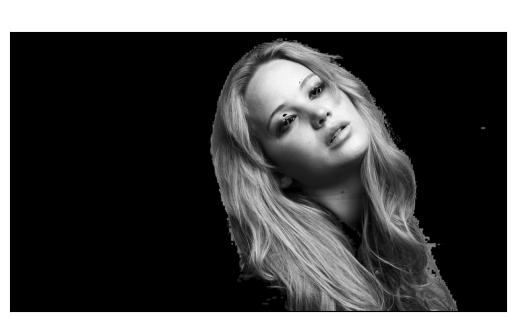

In [58]:
jen_img=cv.imread("/content/drive/MyDrive/Images-20240703 (1)/jeniffer.jpg",0)
ret, mask = cv.threshold(saturation, 11, 1, cv.THRESH_BINARY)
img2=cv.bitwise_and(jen_img,jen_img,mask=mask)
plt.imshow(img2,cmap="gray",vmin=0,vmax=255)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("Foreground",c="w")

Histogram Equalization Using OpenCV

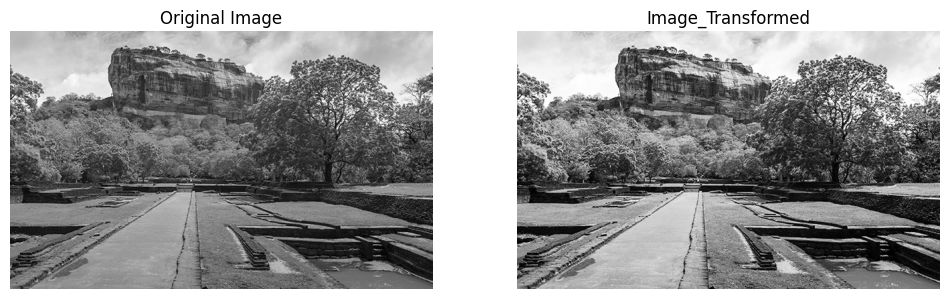

In [37]:
f = cv.imread('/content/drive/MyDrive/Images-20240703 (1)/sigiriya.jpg', cv.IMREAD_GRAYSCALE)
g = cv.equalizeHist(f)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title('Image_Transformed')
for a in ax:
  a.axis('off')
plt.show()


Averaging Using cv.filter2D

Text(0.5, 1.0, 'Foreground with Histogram Equilization')

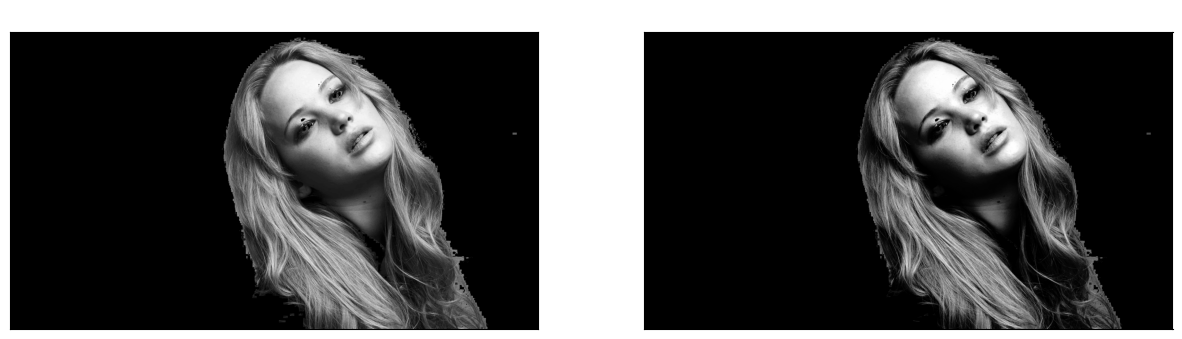

In [60]:
jen_img=cv.imread("/content/drive/MyDrive/Images-20240703 (1)/jeniffer.jpg",0)
ret, mask = cv.threshold(saturation, 11, 1, cv.THRESH_BINARY)
img2=cv.bitwise_and(jen_img,jen_img,mask=mask)
w=img2.shape[0]
h=img2.shape[1]
hist1=hist.cumsum()
norm_hist1=hist1*(255/(hist.sum()))
img_new=cv.LUT(img2,norm_hist1).astype(np.uint8)
fig,ax=plt.subplots(1,2,figsize=(15,15))
#plt.hist(img3.flatten(),256,[0,256],color='r')
ax[0].imshow(img2,cmap="gray")
ax[1].imshow(img_new,cmap="gray")
#ax[2].imshow(img3,cmap="gray")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[0].set_title("Foreground",c="w")
ax[1].set_title("Foreground with Histogram Equilization",c="w")

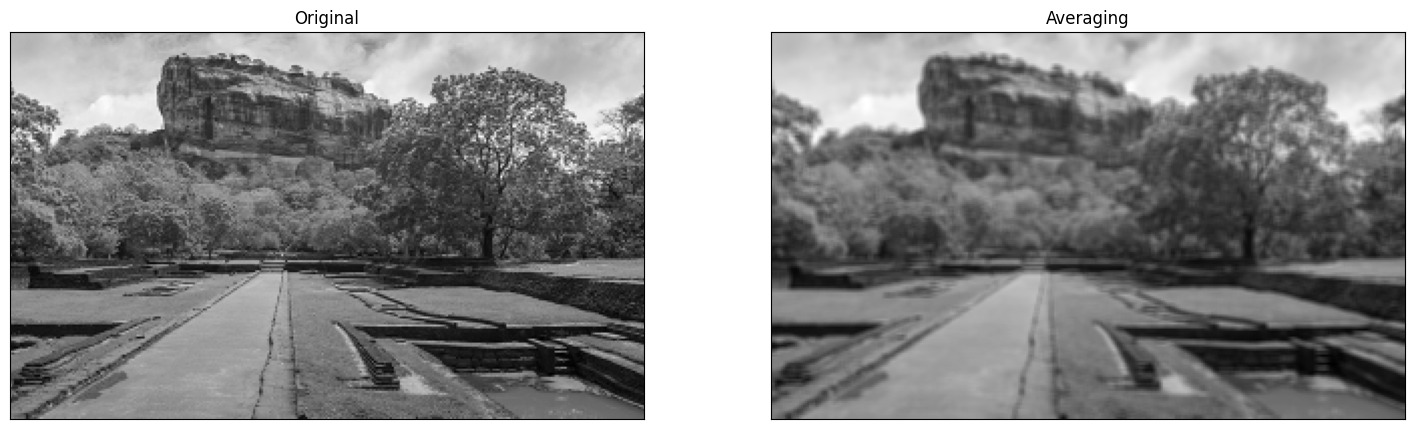

In [41]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
im = cv.imread('/content/drive/MyDrive/Images-20240703 (1)/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
kernel = np.ones((3,3),np.float32)/9
imavg = cv.filter2D(im, cv.CV_32F, kernel)
fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imavg, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

Sobel Filtering Using cv.filter2D

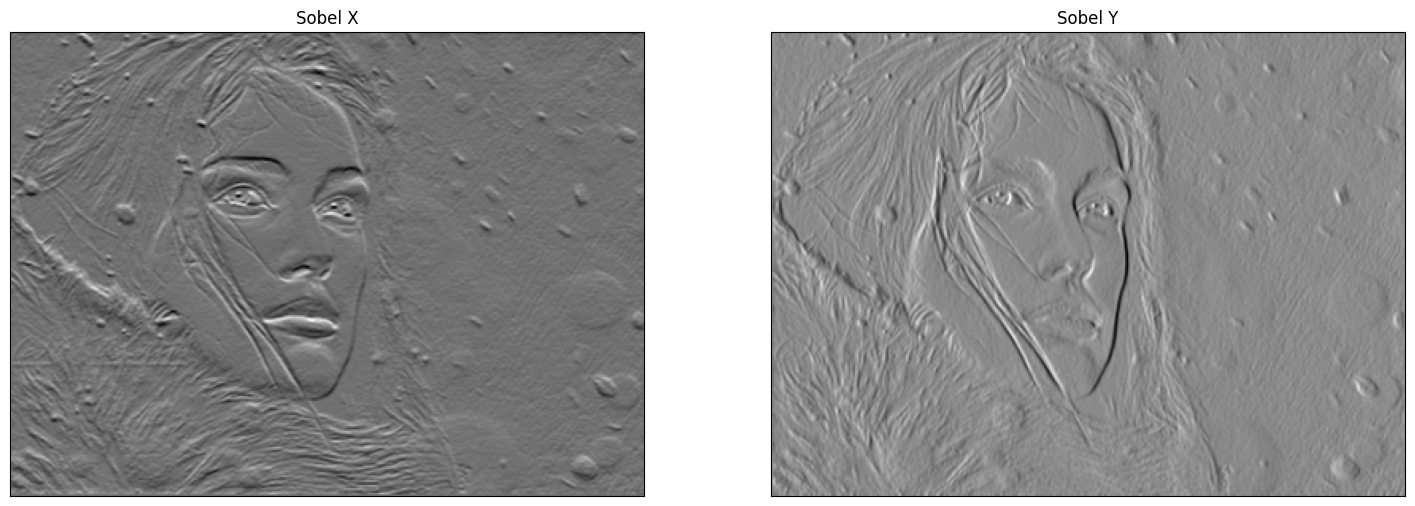

In [45]:
13
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
im = cv.imread('/content/drive/MyDrive/Images-20240703 (1)/keira_gray.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)
fig, ax = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()